<img src="./Img/banner-fa-49-2.jpg">
12 апреля 2021 года, ВМ/305-1(кк)

# Тема 5. Анализ временных рядов

Студенты: Поток У18-7у<br>
Преподаватель: Смирнов Михаил Викторович, доцент Департамента Анализа данных и машинного обучения Финансового университета при Правительстве Российской Федерации

Задание. Имеется файл с информацией об изменении цены акции Apple за период времени. Построить график динамики и линию тренда по значению цены закрытия. Построить гистограмму. В процессе выполнения задания необходимо преобразовать данные к типу даты и числа, где это необходимо.

Файл с данными: *HistoricPricesappleBAE.csv* находится в папке *Data*. Источник: https://www.finanz.ru

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Создадим таблицу - объект *DataFrame*

In [3]:
df = pd.read_csv('Data/HistoricPricesappleBAE.csv', sep=';')
df

,Date,Open,ClosingPrice,DailyHigh,DailyLow,VolumePcs
0,06.11.2020,NaN,"99,91500","100,27000","99,42500",NaN
1,05.11.2020,NaN,"100,60000","100,86000","100,13000",NaN
2,04.11.2020,NaN,"98,09500","98,51500","97,69500",NaN
3,03.11.2020,NaN,"94,35500","95,24000","93,81500",NaN
4,02.11.2020,NaN,"93,39500","93,45000","92,34000",NaN
...,...,...,...,...,...,...
208,08.01.2020,NaN,"68,20625","68,50625","67,98750",NaN
209,07.01.2020,NaN,"66,93125","67,32500","66,84375",NaN
210,06.01.2020,NaN,"66,95000","67,00625","66,78750",NaN
211,03.01.2020,NaN,"66,61250","67,26250","66,61250",NaN


Для получения краткой информации о *df* используем метод **_info()_**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          213 non-null    object 
 1   Open          0 non-null      float64
 2   ClosingPrice  213 non-null    object 
 3   DailyHigh     209 non-null    object 
 4   DailyLow      209 non-null    object 
 5   VolumePcs     0 non-null      float64
dtypes: float64(2), object(4)
memory usage: 10.1+ KB


Столбцы *Date* и *ClosingPrice* имеют тип 'object'. Проведем преобразование типов.

In [4]:
df['ClosingPrice'] = df['ClosingPrice'].str.replace(',', '.')
df['ClosingPrice'] = pd.to_numeric(df['ClosingPrice'])
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [5]:
df

,Date,Open,ClosingPrice,DailyHigh,DailyLow,VolumePcs
0,2020-11-06,NaN,99.91500,"100,27000","99,42500",NaN
1,2020-11-05,NaN,100.60000,"100,86000","100,13000",NaN
2,2020-11-04,NaN,98.09500,"98,51500","97,69500",NaN
3,2020-11-03,NaN,94.35500,"95,24000","93,81500",NaN
4,2020-11-02,NaN,93.39500,"93,45000","92,34000",NaN
...,...,...,...,...,...,...
208,2020-01-08,NaN,68.20625,"68,50625","67,98750",NaN
209,2020-01-07,NaN,66.93125,"67,32500","66,84375",NaN
210,2020-01-06,NaN,66.95000,"67,00625","66,78750",NaN
211,2020-01-03,NaN,66.61250,"67,26250","66,61250",NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          213 non-null    datetime64[ns]
 1   Open          0 non-null      float64       
 2   ClosingPrice  213 non-null    float64       
 3   DailyHigh     209 non-null    object        
 4   DailyLow      209 non-null    object        
 5   VolumePcs     0 non-null      float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 10.1+ KB


Теперь *Date* - это дата, а *ClosingPrice* - число.

Отсортируем по дате

In [10]:
df.sort_values(by='Date', inplace=True)
df

,Date,Open,ClosingPrice,DailyHigh,DailyLow,VolumePcs
212,2020-01-02,NaN,67.28750,"67,28750","66,71250",NaN
211,2020-01-03,NaN,66.61250,"67,26250","66,61250",NaN
210,2020-01-06,NaN,66.95000,"67,00625","66,78750",NaN
209,2020-01-07,NaN,66.93125,"67,32500","66,84375",NaN
208,2020-01-08,NaN,68.20625,"68,50625","67,98750",NaN
...,...,...,...,...,...,...
4,2020-11-02,NaN,93.39500,"93,45000","92,34000",NaN
3,2020-11-03,NaN,94.35500,"95,24000","93,81500",NaN
2,2020-11-04,NaN,98.09500,"98,51500","97,69500",NaN
1,2020-11-05,NaN,100.60000,"100,86000","100,13000",NaN


Перестроим индекс

In [11]:
df.reset_index(inplace=True)
df.head()

,index,Date,Open,ClosingPrice,DailyHigh,DailyLow,VolumePcs
0,212,2020-01-02,NaN,67.28750,"67,28750","66,71250",NaN
1,211,2020-01-03,NaN,66.61250,"67,26250","66,61250",NaN
2,210,2020-01-06,NaN,66.95000,"67,00625","66,78750",NaN
3,209,2020-01-07,NaN,66.93125,"67,32500","66,84375",NaN
4,208,2020-01-08,NaN,68.20625,"68,50625","67,98750",NaN


In [12]:
df.drop("index", axis=1, inplace=True)
df.head()

,Date,Open,ClosingPrice,DailyHigh,DailyLow,VolumePcs
0,2020-01-02,NaN,67.28750,"67,28750","66,71250",NaN
1,2020-01-03,NaN,66.61250,"67,26250","66,61250",NaN
2,2020-01-06,NaN,66.95000,"67,00625","66,78750",NaN
3,2020-01-07,NaN,66.93125,"67,32500","66,84375",NaN
4,2020-01-08,NaN,68.20625,"68,50625","67,98750",NaN


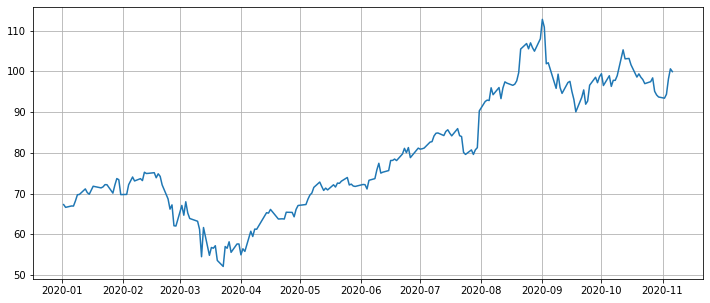

In [47]:
plt.figure(figsize=(12, 5))
x = df['Date']
y = df['ClosingPrice']
plt.plot(x, y)
plt.grid();

Найдем параметры линии тренда. Создадим стобец с номером измерения, значения которого начинаются от 1

In [48]:
df['No'] = pd.Series(np.arange(1, len(df)+1))
df.tail()

,Date,Open,ClosingPrice,DailyHigh,DailyLow,VolumePcs,No,Trend
208,2020-11-02,NaN,93.395,"93,45000","92,34000",NaN,209,1357.148641
209,2020-11-03,NaN,94.355,"95,24000","93,81500",NaN,210,1369.670402
210,2020-11-04,NaN,98.095,"98,51500","97,69500",NaN,211,1382.192162
211,2020-11-05,NaN,100.600,"100,86000","100,13000",NaN,212,1394.713923
212,2020-11-06,NaN,99.915,"100,27000","99,42500",NaN,213,1407.235684


$$
y = a + b \cdot x
$$


$$
b=\frac{cov(x,y)}{Disp_x}
$$

$$
a=E(y)- b \cdot E(x)
$$

In [52]:
cov_matrix = np.cov(df['ClosingPrice'], df['No'])
cov_matrix

array([[ 218.22339044,  771.74080778],
       [ 771.74080778, 3798.5       ]])

In [53]:
cov_xy=cov_matrix[1,0]
print(cov_xy)

771.7408077830192


In [54]:
disp_x = df['No'].std()**2
disp_x

3798.5

In [55]:
b = cov_xy / disp_x
a = df['ClosingPrice'].mean() - b*df['No'].mean()
print(a, b)

58.18987161174592 0.2031698848974646


In [56]:
df['Trend'] = a + b*df['No']
df

,Date,Open,ClosingPrice,DailyHigh,DailyLow,VolumePcs,No,Trend
0,2020-01-02,NaN,67.28750,"67,28750","66,71250",NaN,1,58.393041
1,2020-01-03,NaN,66.61250,"67,26250","66,61250",NaN,2,58.596211
2,2020-01-06,NaN,66.95000,"67,00625","66,78750",NaN,3,58.799381
3,2020-01-07,NaN,66.93125,"67,32500","66,84375",NaN,4,59.002551
4,2020-01-08,NaN,68.20625,"68,50625","67,98750",NaN,5,59.205721
...,...,...,...,...,...,...,...,...
208,2020-11-02,NaN,93.39500,"93,45000","92,34000",NaN,209,100.652378
209,2020-11-03,NaN,94.35500,"95,24000","93,81500",NaN,210,100.855547
210,2020-11-04,NaN,98.09500,"98,51500","97,69500",NaN,211,101.058717
211,2020-11-05,NaN,100.60000,"100,86000","100,13000",NaN,212,101.261887


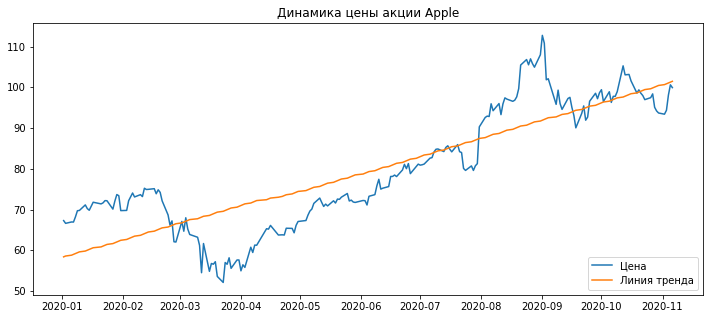

In [57]:
plt.figure(figsize=(12, 5))
plt.title('Динамика цены акции Apple', loc='center')
x = df['Date']
y = df['ClosingPrice']
plt.plot(x, y, label = 'Цена')
plt.plot(x, df['Trend'], label='Линия тренда')
plt.legend(loc='lower right')

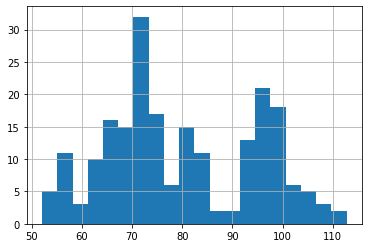

In [46]:
df['ClosingPrice'].hist(bins=20)

### Экспоненциальное сглаживание

In [59]:
alfa = 0.1 # Начальное значение коэффициента сглаживания
while alfa < 1: # выполняется цикл до тех пор, пока alfa меньше единицы
  ExpColumnName = 'Exp0' + str(alfa)[2] # Формируем имя столбца сглаженных значений: Exp01, Exp02 и т. д. до Exp09
  L = [] # Список, в который будем помещать сглаженные значения, сейчас он пуст
  for i in range(len(df)): # создаем цикл от нуля до числа, равного числу строк в таблице минус один
    if i == 0: # первый день
      L.append(np.NaN) # добавляем в список пустое значение, так как сглаженного значения в первый день нет
    elif i == 1: # второй день
      L.append(df['ClosingPrice'][0]) # добавляем в список значение цены в первый день (строка с индексом [0])
    else: # все последующие дни
      L.append(alfa * df['ClosingPrice'][i-1] + (1-alfa) * L[i-1]) # добавляем в список сглаженное значение, сформированное из предыдущего значения цены и предыдущего значения списка
  df[ExpColumnName] = pd.Series(L) # добавляем в датафрейм столбец, содержащий элементы сформированного списка сглаженных значений
  alfa += 0.1 # приращение коэффициента сглаживания

In [60]:
df

,Date,Open,ClosingPrice,DailyHigh,DailyLow,VolumePcs,No,Trend,Exp01,Exp02,Exp03,Exp04,Exp05,Exp06,Exp07,Exp08,Exp09
0,2020-01-02,NaN,67.28750,"67,28750","66,71250",NaN,1,58.393041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-03,NaN,66.61250,"67,26250","66,61250",NaN,2,58.596211,67.287500,67.287500,67.287500,67.287500,67.287500,67.287500,67.287500,67.287500,67.28750
2,2020-01-06,NaN,66.95000,"67,00625","66,78750",NaN,3,58.799381,67.220000,67.152500,67.085000,67.017500,66.950000,66.882500,66.747500,66.680000,66.61250
3,2020-01-07,NaN,66.93125,"67,32500","66,84375",NaN,4,59.002551,67.193000,67.112000,67.044500,66.990500,66.950000,66.923000,66.909500,66.923000,66.95000
4,2020-01-08,NaN,68.20625,"68,50625","67,98750",NaN,5,59.205721,67.166825,67.075850,67.010525,66.966800,66.940625,66.927950,66.926900,66.930425,66.93125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,2020-11-02,NaN,93.39500,"93,45000","92,34000",NaN,209,100.652378,97.624429,96.507299,95.580692,94.957212,94.528396,94.221541,93.850750,93.752193,93.69000
209,2020-11-03,NaN,94.35500,"95,24000","93,81500",NaN,210,100.855547,97.201486,95.884839,94.924985,94.332327,93.961698,93.725617,93.486150,93.430719,93.39500
210,2020-11-04,NaN,98.09500,"98,51500","97,69500",NaN,211,101.058717,96.916838,95.578871,94.753989,94.341396,94.158349,94.103247,94.181230,94.262572,94.35500
211,2020-11-05,NaN,100.60000,"100,86000","100,13000",NaN,212,101.261887,97.034654,96.082097,95.756292,95.842838,96.126675,96.498299,97.312246,97.711757,98.09500


Построим график

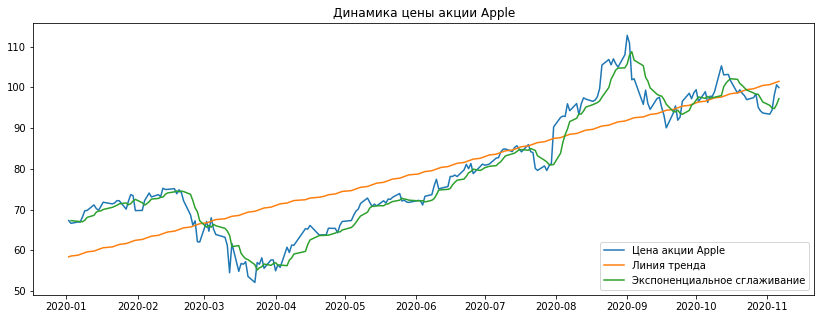

In [62]:
plt.figure(figsize=(14, 5))
plt.title('Динамика цены акции Apple', loc='center')
x = df['Date']
y = df['ClosingPrice']
yt = df['Trend']
ye = df['Exp03']
plt.plot(x, y, label = 'Цена акции Apple')
plt.plot(x, yt, label = 'Линия тренда')
plt.plot(x, ye, label = 'Экспоненциальное сглаживание')
plt.legend(loc='lower right')

Второй способ, с помощью функции

In [65]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

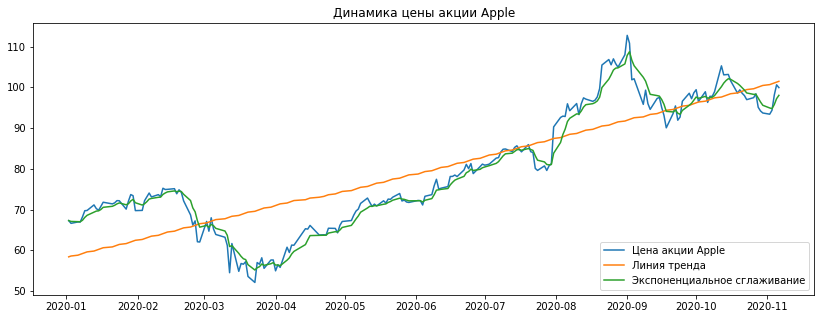

In [66]:
plt.figure(figsize=(14, 5))
plt.title('Динамика цены акции Apple', loc='center')
x = df['Date']
y = df['ClosingPrice']
yt = df['Trend']
ye = exponential_smoothing(df['ClosingPrice'], 0.3)
plt.plot(x, y, label = 'Цена акции Apple')
plt.plot(x, yt, label = 'Линия тренда')
plt.plot(x, ye, label = 'Экспоненциальное сглаживание')
plt.legend(loc='lower right')

### Скользящее среднее

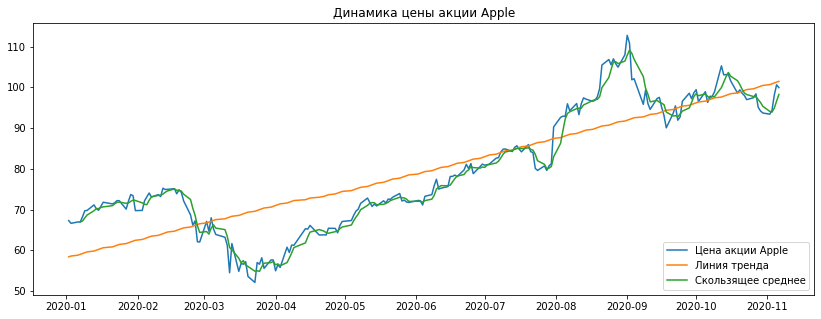

In [67]:
plt.figure(figsize=(14, 5))
plt.title('Динамика цены акции Apple', loc='center')
x = df['Date']
y = df['ClosingPrice']
yt = df['Trend']
ye = df['ClosingPrice'].rolling(4).mean()
plt.plot(x, y, label = 'Цена акции Apple')
plt.plot(x, yt, label = 'Линия тренда')
plt.plot(x, ye, label = 'Скользящее среднее')
plt.legend(loc='lower right')

# Анализ данных MAIL.RU

In [8]:
data = pd.read_csv("MAIL_201214_210412.csv", sep=";")
data

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>
0,MAIL,D,20201214,0,2085.2
1,MAIL,D,20201215,0,2086.0
2,MAIL,D,20201216,0,2063.8
3,MAIL,D,20201217,0,2049.6
4,MAIL,D,20201218,0,2007.4
...,...,...,...,...,...
77,MAIL,D,20210406,0,1759.4
78,MAIL,D,20210407,0,1748.0
79,MAIL,D,20210408,0,1743.6
80,MAIL,D,20210409,0,1717.2


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   <TICKER>  82 non-null     object 
 1   <PER>     82 non-null     object 
 2   <DATE>    82 non-null     int64  
 3   <TIME>    82 non-null     int64  
 4   <CLOSE>   82 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.3+ KB


In [11]:
data["<DATESTR>"] = data["<DATE>"].apply(lambda x : str(x))

In [15]:
data["<DATESTR>"] = data["<DATESTR>"].apply(lambda x : x[:4]+'.'+x[4:6]+'.'+x[6:])

In [18]:
data.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<DATESTR>
0,MAIL,D,20201214,0,2085.2,2020.12.14
1,MAIL,D,20201215,0,2086.0,2020.12.15
2,MAIL,D,20201216,0,2063.8,2020.12.16
3,MAIL,D,20201217,0,2049.6,2020.12.17
4,MAIL,D,20201218,0,2007.4,2020.12.18


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   <TICKER>   82 non-null     object 
 1   <PER>      82 non-null     object 
 2   <DATE>     82 non-null     int64  
 3   <TIME>     82 non-null     int64  
 4   <CLOSE>    82 non-null     float64
 5   <DATESTR>  82 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.0+ KB


In [22]:
data["<DATEDATE>"]=pd.to_datetime(data["<DATESTR>"])
data

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<DATESTR>,<DATEDATE>
0,MAIL,D,20201214,0,2085.2,2020.12.14,2020-12-14
1,MAIL,D,20201215,0,2086.0,2020.12.15,2020-12-15
2,MAIL,D,20201216,0,2063.8,2020.12.16,2020-12-16
3,MAIL,D,20201217,0,2049.6,2020.12.17,2020-12-17
4,MAIL,D,20201218,0,2007.4,2020.12.18,2020-12-18
...,...,...,...,...,...,...,...
77,MAIL,D,20210406,0,1759.4,2021.04.06,2021-04-06
78,MAIL,D,20210407,0,1748.0,2021.04.07,2021-04-07
79,MAIL,D,20210408,0,1743.6,2021.04.08,2021-04-08
80,MAIL,D,20210409,0,1717.2,2021.04.09,2021-04-09


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   <TICKER>    82 non-null     object        
 1   <PER>       82 non-null     object        
 2   <DATE>      82 non-null     int64         
 3   <TIME>      82 non-null     int64         
 4   <CLOSE>     82 non-null     float64       
 5   <DATESTR>   82 non-null     object        
 6   <DATEDATE>  82 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 4.6+ KB


In [25]:
data.drop(["<DATESTR>", "<DATE>" ], axis=1, inplace=True)

In [29]:
data.head()

,<TICKER>,<PER>,<TIME>,<CLOSE>,<DATEDATE>,No
0,MAIL,D,0,2085.2,2020-12-14,1
1,MAIL,D,0,2086.0,2020-12-15,2
2,MAIL,D,0,2063.8,2020-12-16,3
3,MAIL,D,0,2049.6,2020-12-17,4
4,MAIL,D,0,2007.4,2020-12-18,5


In [28]:
data["No"] = np.arange(1,len(data)+1)

In [38]:
cov_xy = np.cov(data["<CLOSE>"], data["No"])[0,1]
cov_xy

-2115.654320987654

In [36]:
disp_x = data["No"].std()**2
disp_x

567.1666666666666

In [40]:
b = cov_xy / disp_x
b

-3.7302162579858726

In [41]:
a = np.mean(data["<CLOSE>"]) - b * np.mean(data["No"])
a

2089.603974706414

In [42]:
data["Trend"] = a + b * data["No"]

In [43]:
data.head()

,<TICKER>,<PER>,<TIME>,<CLOSE>,<DATEDATE>,No,Trend
0,MAIL,D,0,2085.2,2020-12-14,1,2085.873758
1,MAIL,D,0,2086.0,2020-12-15,2,2082.143542
2,MAIL,D,0,2063.8,2020-12-16,3,2078.413326
3,MAIL,D,0,2049.6,2020-12-17,4,2074.683110
4,MAIL,D,0,2007.4,2020-12-18,5,2070.952893


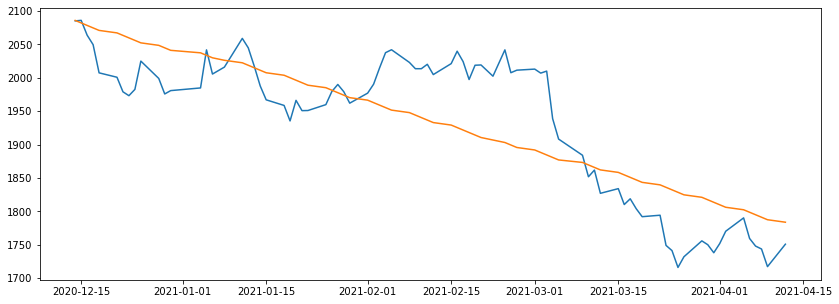

In [45]:
plt.figure(figsize=(14, 5))
plt.plot(data["<DATEDATE>"], data["<CLOSE>"])
plt.plot(data["<DATEDATE>"], data["Trend"])